<a href="https://colab.research.google.com/github/hyperepoch/TeachMe/blob/code_me/eda0409.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


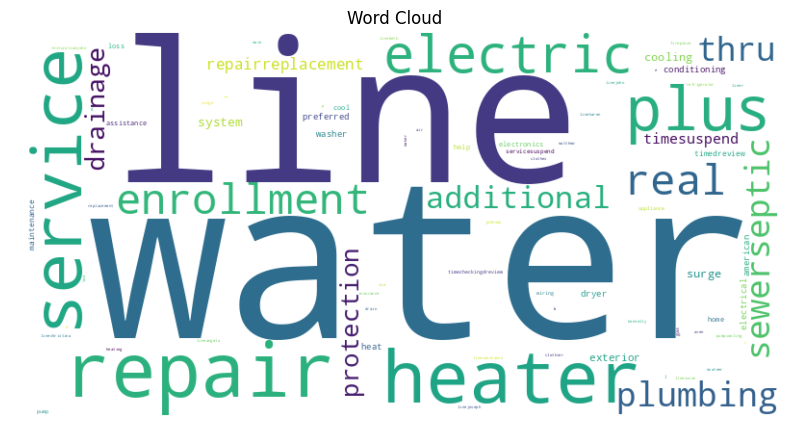

<ipython-input-1-4f0830a46512>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="crest")


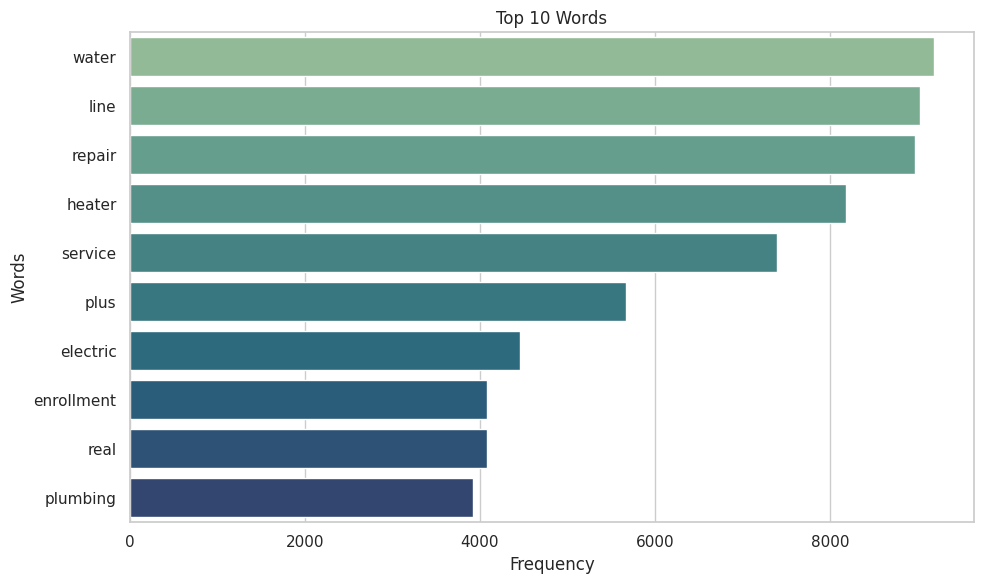

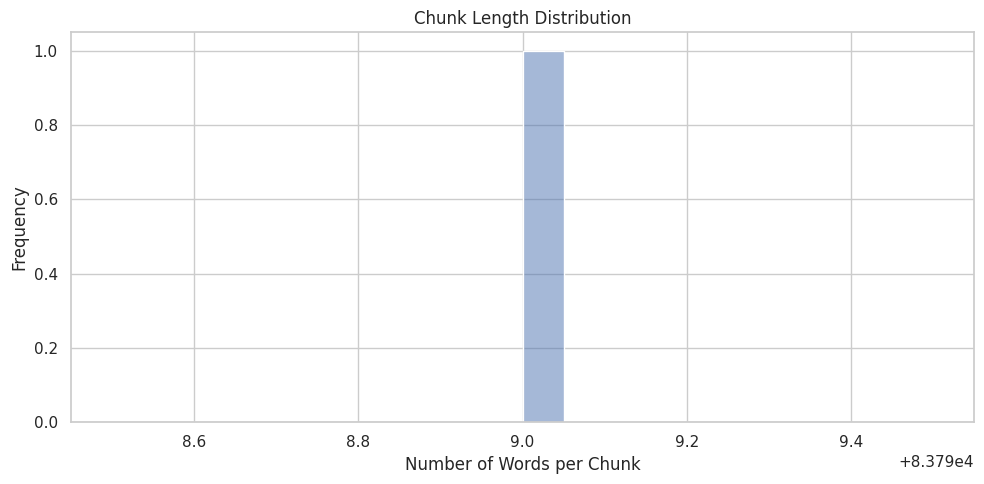

In [ ]:
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

class FileLoader:
    def __init__(self, filepath):
        self.filepath = filepath

    def load(self):
        with open(self.filepath, 'r', encoding='utf-8') as file:
            return file.read()


class TextChunker:
    def __init__(self, raw_text):
        self.raw_text = raw_text

    def chunk_by_paragraph(self):
        return [para.strip() for para in self.raw_text.split('\n\n') if para.strip()]


class TextCleaner:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.punct_table = str.maketrans('', '', string.punctuation)

    def clean_text(self, text):
        text = text.lower()
        text = text.translate(self.punct_table)
        words = text.split()
        return [w for w in words if w not in self.stop_words and w.isalpha()]


class TextProfiler:
    def __init__(self, cleaned_chunks):
        self.cleaned_chunks = cleaned_chunks
        self.word_freq = Counter()
        self.chunk_lengths = []

    def profile(self):
        for chunk in self.cleaned_chunks:
            self.word_freq.update(chunk)
            self.chunk_lengths.append(len(chunk))

    def get_top_words(self, percent=10):
        total = len(self.word_freq)
        top_n = math.ceil(total * percent / 100)
        return self.word_freq.most_common(top_n)

    def get_longest_chunks(self, original_chunks, percent=10):
        total = len(original_chunks)
        top_n = math.ceil(total * percent / 100)
        return sorted(original_chunks, key=lambda x: len(x.split()), reverse=True)[:top_n]


class Visualizer:
    def __init__(self, word_freq, chunk_lengths):
        self.word_freq = word_freq
        self.chunk_lengths = chunk_lengths

    def show_wordcloud(self):
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(self.word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title("Word Cloud")
        plt.show()

    def show_top_words_bar(self, top_n=10):
        top_words = self.word_freq.most_common(top_n)
        words, counts = zip(*top_words)
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(counts), y=list(words), palette="crest")
        plt.title(f"Top {top_n} Words")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.tight_layout()
        plt.show()

    def show_chunk_length_distribution(self):
        plt.figure(figsize=(10, 5))
        sns.histplot(self.chunk_lengths, bins=20, kde=True)
        plt.title("Chunk Length Distribution")
        plt.xlabel("Number of Words per Chunk")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


class DataInsightApp:
    def __init__(self, filepath):
        self.filepath = filepath

    def run(self):
        raw_text = FileLoader(self.filepath).load()
        original_chunks = TextChunker(raw_text).chunk_by_paragraph()
        cleaner = TextCleaner()
        cleaned_chunks = [cleaner.clean_text(chunk) for chunk in original_chunks]

        profiler = TextProfiler(cleaned_chunks)
        profiler.profile()

        visualizer = Visualizer(profiler.word_freq, profiler.chunk_lengths)
        visualizer.show_wordcloud()
        visualizer.show_top_words_bar()
        visualizer.show_chunk_length_distribution()

        # Show Top % Words and Chunks
        top_words = profiler.get_top_words(percent=10)
        top_chunks = profiler.get_longest_chunks(original_chunks, percent=10)

        print("\n🔝 Top 10% Most Frequent Words:")
        for word, freq in top_words:
            print(f"{word}: {freq}")

        print("\n🧩 Top 10% Longest Chunks:")
        for i, chunk in enumerate(top_chunks, 1):
            print(f"\nChunk {i} ({len(chunk.split())} words):\n{chunk}")


# ========== Usage ==========
if __name__ == "__main__":
    filepath = "edasmall.txt"  # Replace with the path to your file
    app = DataInsightApp(filepath)
    app.run()
